In [1]:
%install_ext /home/pi/git/ipython-circuitikz/circuitikz.py
%reload_ext circuitikz

Installed circuitikz.py. To use it, type:
  %load_ext circuitikz


##### S09 Oscillateur Amorti Libre

Démonstration simple de l'intégration d'un système d'équations ordinaires différentielles, utilisant odeint. Ci-desssous simulation d'un circuit :

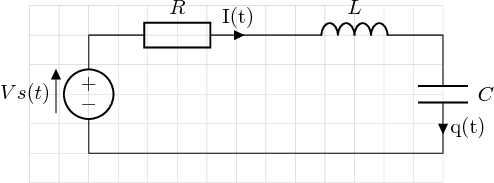

In [13]:
%%circuitikz filename=rlc dpi=150
\begin{circuitikz}
\draw[step=0.5,very thin,black!20] (-1,-0.5) grid (6,2.5);
\path (0,0) coordinate (ref_gnd);
\draw
  (ref_gnd) to[american voltage source=\(Vs(t)\)] ++(0,2)
            %---to[I=\(I(t)\)] ++(3,0)--- 
            to[R=\(R\),i>=I(t)] ++(3,0) 
            to[L=\(L\)] ++(3,0) 
            to[C=\(C\),i=q(t)] ++(0,-2) 
  -- (ref_gnd);
\end{circuitikz}

On résoud, la charge du condensateur $q$ et le courant $I$ comme fonction de temps.

La source de tension $V_s$  est fermée initialement et ensuite à $t=1$, elle est ouverte avec 1 $V$. En conséquence, ) $t=3$, elle est abaissée à 0.5 $V$.

Le vecteur d'état est $[ q, I ]$


In [5]:
%matplotlib inline
from pylab import *
from scipy import *
from scipy.integrate import odeint

Fonction retournant la tension à travers la tension source au temps $t$.

In [6]:
@vectorize
def voltage_source(t):    
    if t < 1:
        Vs = 0.
    elif t < 3:
        Vs = 1.
    else:
        Vs = 0.5
    return Vs

Fonction prenant un vecteur d'état et un temps, returne la dérivé par rapport au temps du vecteur d'état à ce temps là.
L'état est ici $[ q, I ]$

$q, I$ = $Etat$, donne le vecteur d'état.

Définir les constantes

$\frac{dstate}{dt}$

ds_dt = array $([ $I$,\frac{Vs}{L} - \frac{R}{L}  I - \frac{q}{LC}])$

In [7]:
def dstate_dt(state, t):
    q, I = state    
    R = 0.1
    L = 0.01
    C = 0.1
    Vs = voltage_source(t)    
    ds_dt = array([ I,Vs/L - (R/L)* I - q/(L*C) ])
    return ds_dt

Définition de l'état initial de $q=0$, $I=0$

On défini le tableau des temps dont on désire la réponse.

Intégration du système et résultats mis dans $q$ et $I$.

Ensuite préparation cosmétique et affichage du graphique.

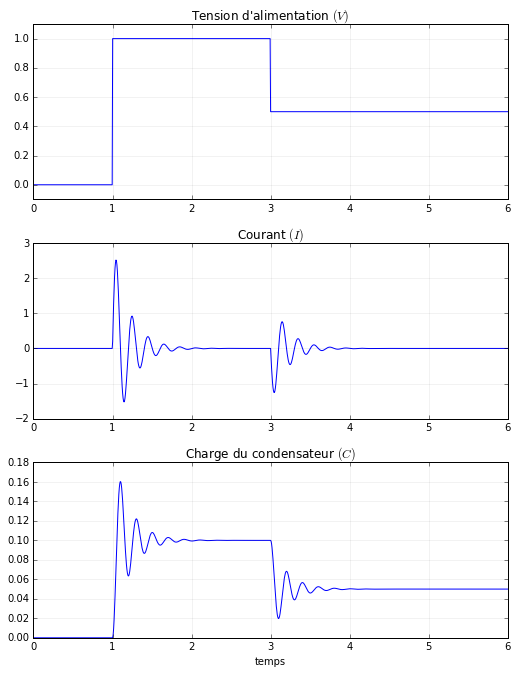

In [8]:
state_0 = array([0., 0.])
times = linspace(0, 6, 1001)
q, I = odeint(dstate_dt, state_0, times).T
figure(figsize=(8.5,11))
subplots_adjust(hspace=0.25)
subplot(3, 1, 1)
plot(times, voltage_source(times))
grid(ls='-', alpha=0.1)
title("Tension d'alimentation $(V)$")
ylim(-0.1, 1.1)
subplot(3, 1, 2)
plot(times, I)
grid(ls='-', alpha=0.1)
title("Courant $(I)$")
subplot(3, 1, 3)
plot(times, q)
grid(ls='-', alpha=0.1)
title("Charge du condensateur $(C)$")
xlabel("temps")
show()